데이터 합치기
- 가로 합치기(기준 필드를 대상으로 열 추가)

  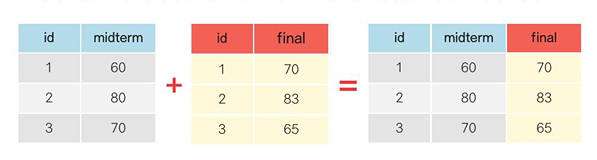

- 세로 합치기(필드에 따른 행추가)

  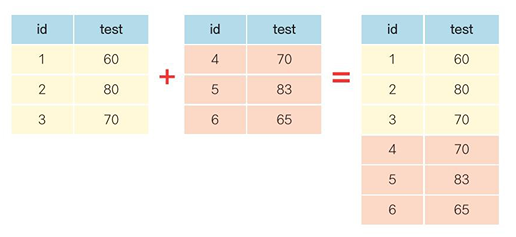

가로 합치기(열 추가): pd.merge(df1, df2, on="기준필드", how="inner") => df1에 df2의 열들을 기준필드에 맞추어 추가
- how: inner(교집합), outer(합집합, 값이 없으면 NaN), left(df1기준), right(df2기준)
- left_on: df1 기준필드, right_on: df2 기준 필드

In [1]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({"id":[1,2,3,4,5,6],
                    "midtem":[60,80,75,90,95,91]})

df2 = pd.DataFrame({"id":[1,2,3,4,5,7],
                    "final":[70,88,85,92,88,90]})

display(df1)
display(df2)

,id,midtem
0,1,60
1,2,80
2,3,75
3,4,90
4,5,95
5,6,91


,id,final
0,1,70
1,2,88
2,3,85
3,4,92
4,5,88
5,7,90


In [2]:
# df1, df2 가로 합치 진행
df0 = pd.merge(df1, df2, on="id")  # how = inner
display(df0)

df0 = pd.merge(df1, df2, on="id", how="outer") 
display(df0)

,id,midtem,final
0,1,60,70
1,2,80,88
2,3,75,85
3,4,90,92
4,5,95,88


,id,midtem,final
0,1,60.0,70.0
1,2,80.0,88.0
2,3,75.0,85.0
3,4,90.0,92.0
4,5,95.0,88.0
5,6,91.0,NaN
6,7,NaN,90.0


In [3]:
df0 = pd.merge(df1, df2, on="id", how="left") 
display(df0)

df0 = pd.merge(df1, df2, on="id", how="right") 
display(df0)

,id,midtem,final
0,1,60,70.0
1,2,80,88.0
2,3,75,85.0
3,4,90,92.0
4,5,95,88.0
5,6,91,NaN


,id,midtem,final
0,1,60.0,70
1,2,80.0,88
2,3,75.0,85
3,4,90.0,92
4,5,95.0,88
5,7,NaN,90


In [4]:
# df3에 df1, df2 데이터 가로 합치기(열 병합)
df3 = pd.DataFrame({"No":[1,2,3,4,5,6,7],
                    "teacher":["kim","kim","lee","lee","seo","seo","kim"]})
display(df3)

df0 = pd.merge(df3, df1, how="outer",left_on="No", right_on="id").drop(["id"], axis=1)  # axis=0:행(기본), axis=1:열
display(df0)

df0 = pd.merge(df0, df2, how="outer",left_on="No", right_on="id").drop(["id"], axis=1) 
display(df0)

,No,teacher
0,1,kim
1,2,kim
2,3,lee
3,4,lee
4,5,seo
5,6,seo
6,7,kim


,No,teacher,midtem
0,1,kim,60.0
1,2,kim,80.0
2,3,lee,75.0
3,4,lee,90.0
4,5,seo,95.0
5,6,seo,91.0
6,7,kim,NaN


,No,teacher,midtem,final
0,1,kim,60.0,70.0
1,2,kim,80.0,88.0
2,3,lee,75.0,85.0
3,4,lee,90.0,92.0
4,5,seo,95.0,88.0
5,6,seo,91.0,NaN
6,7,kim,NaN,90.0


세로 합치기(행 추가): pd.concat([df1, df2, .....], 옵션.....)
- ignore_index: True=>index 제정의, False(기본)=>기존 index 사용(중복)
- axis: 0(기본)=>행추가(아래에 추가), 1=>열추가(좌우 붙여넣기, marge 추천) 
- join: outer=>합집합, inner=>교집합|

In [5]:
# data 폴더의 지역별 주유소 위치 (1), (2) 읽어오기

df1 = pd.read_excel("./data/지역_위치별(주유소) (1).xls", header=2)
display(df1.head(3))

df2 = pd.read_excel("./data/지역_위치별(주유소) (2).xls", header=2)
display(df2.head(3))

df3 = pd.read_excel("./data/지역_위치별(주유소) (2).xls", header=2)
display(df3.head(3))

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1559,1469,-
1,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1869,1569,1489,-
2,서울특별시,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,1839,1573,1535,-


,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1559,1469,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1584,1485,-
2,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1855,1616,1538,1500


,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1559,1469,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1584,1485,-
2,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1855,1616,1538,1500


In [6]:
#  df1, df2 데이터를 세로 합치기(행 추가)

df0 = pd.concat([df1, df2, df3])
display(df0.head(3))

df0.info()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1559,1469,-
1,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1869,1569,1489,-
2,서울특별시,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,1839,1573,1535,-


<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 13
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      60 non-null     object
 1   상호      60 non-null     object
 2   주소      60 non-null     object
 3   상표      60 non-null     object
 4   전화번호    60 non-null     object
 5   셀프여부    60 non-null     object
 6   고급휘발유   60 non-null     object
 7   휘발유     60 non-null     int64 
 8   경유      60 non-null     int64 
 9   실내등유    60 non-null     object
dtypes: int64(2), object(8)
memory usage: 5.2+ KB


In [7]:
df0 = pd.concat([df1, df2, df3], ignore_index=True)
display(df0.head(3))

df0.info()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1559,1469,-
1,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1869,1569,1489,-
2,서울특별시,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,1839,1573,1535,-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      60 non-null     object
 1   상호      60 non-null     object
 2   주소      60 non-null     object
 3   상표      60 non-null     object
 4   전화번호    60 non-null     object
 5   셀프여부    60 non-null     object
 6   고급휘발유   60 non-null     object
 7   휘발유     60 non-null     int64 
 8   경유      60 non-null     int64 
 9   실내등유    60 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.8+ KB


### 지역_위치별(주유소) (1)~(41) 데이터 하나의 파일로 만들기

In [8]:
# os 모듈: 기본 모듈, Operating System의 약자, 운영체제에서 제공되는 여러 기능을 수행
# .getcwd():현재 실행중인 파일의 디렉토리 경로 출력
# .listdir(path): 특정 경로에 존재하는 파일과 하위 디렉터리 목록을 구하는 함수, 결과는 리트스형식으로 출력
# .mkdirs(): 폴더 생성 함수
# .remove(): 파일 삭제 함수
# .path : 폴더명이나 파일명을 확인하고 존재유무를 파악할 수 있도록 도와주는 모듈

import os

# 현재 작업 경로 확인
print(os.getcwd())

e:\멀티캠퍼스 프론트엔드 개발자 취업캠프\3. python\04. Pandas


In [9]:
# data 폴더에 있는 파일목록과 하위 디렉토리 목록 확인
fileDir= "./data/"
fileNames=os.listdir(fileDir)  # 리스트형 데이터로 출력(0~1 파일 제거)
fileNames

['20240117_유류정보.csv',
 'cat1.jpg',
 'LOCAL_PEOPLE_GU_2023.csv',
 '지역_위치별(주유소) (1).xls',
 '지역_위치별(주유소) (10).xls',
 '지역_위치별(주유소) (11).xls',
 '지역_위치별(주유소) (12).xls',
 '지역_위치별(주유소) (13).xls',
 '지역_위치별(주유소) (14).xls',
 '지역_위치별(주유소) (15).xls',
 '지역_위치별(주유소) (16).xls',
 '지역_위치별(주유소) (17).xls',
 '지역_위치별(주유소) (18).xls',
 '지역_위치별(주유소) (19).xls',
 '지역_위치별(주유소) (2).xls',
 '지역_위치별(주유소) (20).xls',
 '지역_위치별(주유소) (21).xls',
 '지역_위치별(주유소) (22).xls',
 '지역_위치별(주유소) (23).xls',
 '지역_위치별(주유소) (24).xls',
 '지역_위치별(주유소) (25).xls',
 '지역_위치별(주유소) (26).xls',
 '지역_위치별(주유소) (27).xls',
 '지역_위치별(주유소) (28).xls',
 '지역_위치별(주유소) (29).xls',
 '지역_위치별(주유소) (3).xls',
 '지역_위치별(주유소) (30).xls',
 '지역_위치별(주유소) (31).xls',
 '지역_위치별(주유소) (32).xls',
 '지역_위치별(주유소) (33).xls',
 '지역_위치별(주유소) (34).xls',
 '지역_위치별(주유소) (35).xls',
 '지역_위치별(주유소) (36).xls',
 '지역_위치별(주유소) (37).xls',
 '지역_위치별(주유소) (38).xls',
 '지역_위치별(주유소) (39).xls',
 '지역_위치별(주유소) (4).xls',
 '지역_위치별(주유소) (40).xls',
 '지역_위치별(주유소) (41).xls',
 '지역_위치별(주유소) (5).xls',
 '지역_위치별(주유소) (6

In [10]:
# 지역_위치별(주유소) (1)~(41) 데이터 세로 합치기
import pandas as pd
import numpy as np
import os

fileDir= "./data/"
fileNames=os.listdir(fileDir)[2:]  # 리스트형 데이터로 출력(0~1 파일 제거)
print(fileNames, "\n")

df0=pd.DataFrame()   # 합친 결과가 저장될 DF 정의

for fname in fileNames:
  if fname.split(".")[-1] == "xls" or fname.split(".")[-1] == "xlsx":  # 엑셀 파일만 추출
    df1 = pd.read_excel(fileDir + fname, header=2)
    df0 = pd.concat([df0, df1], ignore_index=True)

print(df0.info())

['LOCAL_PEOPLE_GU_2023.csv', '지역_위치별(주유소) (1).xls', '지역_위치별(주유소) (10).xls', '지역_위치별(주유소) (11).xls', '지역_위치별(주유소) (12).xls', '지역_위치별(주유소) (13).xls', '지역_위치별(주유소) (14).xls', '지역_위치별(주유소) (15).xls', '지역_위치별(주유소) (16).xls', '지역_위치별(주유소) (17).xls', '지역_위치별(주유소) (18).xls', '지역_위치별(주유소) (19).xls', '지역_위치별(주유소) (2).xls', '지역_위치별(주유소) (20).xls', '지역_위치별(주유소) (21).xls', '지역_위치별(주유소) (22).xls', '지역_위치별(주유소) (23).xls', '지역_위치별(주유소) (24).xls', '지역_위치별(주유소) (25).xls', '지역_위치별(주유소) (26).xls', '지역_위치별(주유소) (27).xls', '지역_위치별(주유소) (28).xls', '지역_위치별(주유소) (29).xls', '지역_위치별(주유소) (3).xls', '지역_위치별(주유소) (30).xls', '지역_위치별(주유소) (31).xls', '지역_위치별(주유소) (32).xls', '지역_위치별(주유소) (33).xls', '지역_위치별(주유소) (34).xls', '지역_위치별(주유소) (35).xls', '지역_위치별(주유소) (36).xls', '지역_위치별(주유소) (37).xls', '지역_위치별(주유소) (38).xls', '지역_위치별(주유소) (39).xls', '지역_위치별(주유소) (4).xls', '지역_위치별(주유소) (40).xls', '지역_위치별(주유소) (41).xls', '지역_위치별(주유소) (5).xls', '지역_위치별(주유소) (6).xls', '지역_위치별(주유소) (7).xls', '지역_위치별(주유소) (8).xls', '지역_위치별(주유소) (9).xl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      801 non-null    object
 1   상호      801 non-null    object
 2   주소      801 non-null    object
 3   상표      801 non-null    object
 4   전화번호    801 non-null    object
 5   셀프여부    801 non-null    object
 6   고급휘발유   801 non-null    object
 7   휘발유     801 non-null    object
 8   경유      801 non-null    object
 9   실내등유    801 non-null    object
dtypes: object(10)
memory usage: 62.7+ KB
None


In [11]:
# 내용 확인
display(df0.head())
display(df0.tail())

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1559,1469,-
1,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1869,1569,1489,-
2,서울특별시,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,1839,1573,1535,-
3,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1597,1519,-
4,서울특별시,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,02-445-5841,Y,-,1598,1559,-


,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
796,서울특별시,SK에너지㈜직영 상계주유소,서울 노원구 노해로 527 (상계동),SK에너지,02-930-5151,N,-,1569,1499,-
797,서울특별시,(주)소모 수락산셀프주유소,서울 노원구 동일로 1772,GS칼텍스,02-3392-5656,Y,-,1595,1495,1600
798,서울특별시,상계동주유소,서울 노원구 노원로26길 191 (상계동),HD현대오일뱅크,02-936-5035,N,-,1595,1525,1540
799,서울특별시,신성주유소,서울 노원구 월계로 328 (월계동),S-OIL,02-916-4334,Y,-,1598,1498,-
800,서울특별시,하계삼호주유소,서울 노원구 공릉로 294 (하계동),GS칼텍스,02-974-8818,N,-,1695,1635,-


In [12]:
# 고급휘발유, 실내등유 필드 삭제
df0 = df0.drop(["고급휘발유", "실내등유"], axis=1)
display(df0.head())

,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,1559,1469
1,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1569,1489
2,서울특별시,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,1573,1535
3,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,1597,1519
4,서울특별시,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,02-445-5841,Y,1598,1559


In [13]:
# 필드의 고유한 값 확인: df["필드명"].unique()
print(df0.지역.unique(), "\n")

# 지역별 데이터 건수: df["필드명"].value_counts()
print(df0["지역"].value_counts())

['서울특별시' '부산광역시'] 

지역
서울특별시    439
부산광역시    362
Name: count, dtype: int64


In [14]:
# 주소에서 특정 글자가 포함되어 있는 값 만 추출
# df[df["대상필드"].str.contains("글자")] => 대상필드에서 글자가 포함된 데이터 추출
# df.query('대상필드.str.contains("글자")')

# 주소에서 부산이 포함되어 있는 데이터 추출
df1 = df0[df0["주소"].str.contains("부산")]
display(df1.head())

df2 = df0.query("주소.str.contains('부산')")
display(df2.head())

,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유
323,부산광역시,(주)풍경에너지,부산 강서구 낙동남로 432,SK에너지,051-971-9688,N,1465,1349
324,부산광역시,부산축산업협동조합 농협주유소,부산광역시 강서구 낙동남로 448 (녹산동),NH-OIL,051-973-8141,N,1469,1359
325,부산광역시,은마석유(주)신호주유소,부산 강서구 낙동남로 514 (화전동),HD현대오일뱅크,051-971-6331,Y,1469,1369
326,부산광역시,우리2주유소,부산 강서구 낙동북로 142 (강동동),알뜰주유소,051-971-5585,Y,1485,1385
327,부산광역시,은마석유 경기장주유소,부산 강서구 낙동북로 364 (대저1동),GS칼텍스,051-971-7956,Y,1485,1385


,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유
323,부산광역시,(주)풍경에너지,부산 강서구 낙동남로 432,SK에너지,051-971-9688,N,1465,1349
324,부산광역시,부산축산업협동조합 농협주유소,부산광역시 강서구 낙동남로 448 (녹산동),NH-OIL,051-973-8141,N,1469,1359
325,부산광역시,은마석유(주)신호주유소,부산 강서구 낙동남로 514 (화전동),HD현대오일뱅크,051-971-6331,Y,1469,1369
326,부산광역시,우리2주유소,부산 강서구 낙동북로 142 (강동동),알뜰주유소,051-971-5585,Y,1485,1385
327,부산광역시,은마석유 경기장주유소,부산 강서구 낙동북로 364 (대저1동),GS칼텍스,051-971-7956,Y,1485,1385


In [15]:
# 두개 이상의 단어가 포한된 데이터 추출(& : AND연산, | : OR연산)
df2 = df0.query("주소.str.contains('노원|마포')")  # df0[df0["주소"].str.contains("노원|마포")]
display(df2.head())
display(df2.tail())

,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유
75,서울특별시,(주)타이거통상 월드컵주유소,서울 마포구 월드컵북로 170 (성산제2동),S-OIL,02-373-3314,Y,1489,1449
76,서울특별시,성산대교셀프주유소,서울 마포구 성산로 144,HD현대오일뱅크,02-323-0078,Y,1499,1479
77,서울특별시,청원주유소,서울 마포구 월드컵북로 113 (성산동),HD현대오일뱅크,02-325-5533,Y,1499,1479
78,서울특별시,마포시엠주유소,서울 마포구 월드컵북로 62,SK에너지,02-338-9447,N,1499,1459
79,서울특별시,에쓰오일(주)마포주유소,서울 마포구 마포대로 186 (공덕동),S-OIL,02-711-5189,Y,1569,1529


,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유
796,서울특별시,SK에너지㈜직영 상계주유소,서울 노원구 노해로 527 (상계동),SK에너지,02-930-5151,N,1569,1499
797,서울특별시,(주)소모 수락산셀프주유소,서울 노원구 동일로 1772,GS칼텍스,02-3392-5656,Y,1595,1495
798,서울특별시,상계동주유소,서울 노원구 노원로26길 191 (상계동),HD현대오일뱅크,02-936-5035,N,1595,1525
799,서울특별시,신성주유소,서울 노원구 월계로 328 (월계동),S-OIL,02-916-4334,Y,1598,1498
800,서울특별시,하계삼호주유소,서울 노원구 공릉로 294 (하계동),GS칼텍스,02-974-8818,N,1695,1635


In [16]:
# 특정 조건을 만족하는 데이터에 대한 값 변경: df0.loc[조건식, "변경필드"] = 값
df0.loc[df0["지역"]=="서울특별시", "지역"] = "서울"
df0.loc[df0["지역"]=="부산광역시", "지역"] = "부산"
print(df0.지역.unique(), "\n")
display(df0.head())


['서울' '부산'] 



,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유
0,서울,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,1559,1469
1,서울,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1569,1489
2,서울,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,1573,1535
3,서울,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,1597,1519
4,서울,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,02-445-5841,Y,1598,1559


In [17]:
df1 = df0[df0["주소"].str.contains("부산")]
display(df1.head())

,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유
323,부산,(주)풍경에너지,부산 강서구 낙동남로 432,SK에너지,051-971-9688,N,1465,1349
324,부산,부산축산업협동조합 농협주유소,부산광역시 강서구 낙동남로 448 (녹산동),NH-OIL,051-973-8141,N,1469,1359
325,부산,은마석유(주)신호주유소,부산 강서구 낙동남로 514 (화전동),HD현대오일뱅크,051-971-6331,Y,1469,1369
326,부산,우리2주유소,부산 강서구 낙동북로 142 (강동동),알뜰주유소,051-971-5585,Y,1485,1385
327,부산,은마석유 경기장주유소,부산 강서구 낙동북로 364 (대저1동),GS칼텍스,051-971-7956,Y,1485,1385


In [18]:
# 텍스트 필드를 특정 문자로 나누어 DataFrame으로 출력
df0["주소"].str.split(" ", expand=True)   # expand=True => 데이터프레임 구조로 만들기

,0,1,2,3,4,5
0,서울,강남구,,헌릉로,731,(세곡동)
1,서울,강남구,헌릉로,730,None,None
2,서울,강남구,테헤란로,619,(삼성동),None
3,서울,강남구,밤고개로,215,(율현동),None
4,서울,강남구,밤고개로,120,(자곡동),None
...,...,...,...,...,...,...
796,서울,노원구,노해로,527,(상계동),None
797,서울,노원구,동일로,1772,None,None
798,서울,노원구,노원로26길,191,(상계동),None
799,서울,노원구,월계로,328,(월계동),None


In [19]:
# 주소에서 "구"만 추출해 "구" 필드 생성하기
df0["구"] = df0["주소"].str.split(" ", expand=True).iloc[:, 1] 
display(df0.head())

,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유,구
0,서울,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,1559,1469,강남구
1,서울,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1569,1489,강남구
2,서울,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,1573,1535,강남구
3,서울,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,1597,1519,강남구
4,서울,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,02-445-5841,Y,1598,1559,강남구


In [20]:
# 구 필드 값 확인
df0["구"].unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강서구', '금정구', '기장군', '남구', '강북구', '동구', '동래구', '부산진구', '북구', '사상구',
       '사하구', '서구', '수영구', '연제구', '영도구', '해운대구', '관악구', '광진구', '구로구',
       '금천구', '노원구'], dtype=object)

In [21]:
# df0.columns
df0=df0[['지역','구','상호', '주소', '상표', '전화번호', '셀프여부', '휘발유', '경유']]
df0.head()

,지역,구,상호,주소,상표,전화번호,셀프여부,휘발유,경유
0,서울,강남구,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,1559,1469
1,서울,강남구,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1569,1489
2,서울,강남구,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,1573,1535
3,서울,강남구,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,1597,1519
4,서울,강남구,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,02-445-5841,Y,1598,1559


In [22]:
# 데이터 정보 보기
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      801 non-null    object
 1   구       801 non-null    object
 2   상호      801 non-null    object
 3   주소      801 non-null    object
 4   상표      801 non-null    object
 5   전화번호    801 non-null    object
 6   셀프여부    801 non-null    object
 7   휘발유     801 non-null    object
 8   경유      801 non-null    object
dtypes: object(9)
memory usage: 56.4+ KB


In [23]:
# 휘발유/경유에 포함된 "-" 값 제거
df0 = df0[df0["경유"] != "-"]
df0 = df0[df0["휘발유"] != "-"]

df0[df0['휘발유']=="-"]

,지역,구,상호,주소,상표,전화번호,셀프여부,휘발유,경유


In [24]:
# 데이터 타입(유형) 변경: df.astype({"필드명":데이터형, "필드명":데이터형, ...})
df0=df0.astype({"휘발유":int, "경유":int})

df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, 0 to 800
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      793 non-null    object
 1   구       793 non-null    object
 2   상호      793 non-null    object
 3   주소      793 non-null    object
 4   상표      793 non-null    object
 5   전화번호    793 non-null    object
 6   셀프여부    793 non-null    object
 7   휘발유     793 non-null    int32 
 8   경유      793 non-null    int32 
dtypes: int32(2), object(7)
memory usage: 55.8+ KB


In [25]:
# 데이터 파일로 저장하기
# index=True: index 포함저장, index=False: 저장시 index 제외
# encoding=? : utf-8 기본, 엑셀에서 열기=> cp949 저장

df0.to_csv("./data/20240117_유류정보.csv", index=False, encoding="utf-8")